# Plots of EDA

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [92]:
data_df = pd.read_excel("../../data/idiap/dataset.xlsx")
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)
data_df = data_df.drop(columns=["Unnamed: 0"])
data_df.head()

,participant_id,collective,contrast,goal,goals2,list,metaphor,moral,question,story,...,final_text,overall_sentiment_all,positive_sentiment_all,negative_sentiment_all,neutra_sentiment_all,mixed_sentiment_all,targets,text_length_all,prolific_score,prolific_indicator_all
0,5e1cf0eb65b6d3071f489de9,0.35,1.07,0.43,0.32,6.96,0.94,2.36,0.01,0.46,...,Hello everyone. Thank you. Taking the time to ...,POSITIVE,0.9569,0.0007,0.0417,0.0007,HIGH,771.0,100.0,2
1,55d06fd334e9060012e5781c,0.30,0.67,0.30,0.20,2.83,0.71,0.22,0.01,0.60,...,"Hi, I am Kathy. I'd love to be considered for ...",NEUTRAL,0.1587,0.0055,0.8350,0.0009,MED,424.0,99.0,2
2,615586b009f801c3f2d4af8d,0.18,0.74,0.16,0.26,3.40,1.10,1.09,0.01,0.37,...,uh yeah I I think I would be the best candidat...,POSITIVE,0.8051,0.0164,0.1747,0.0039,MED,449.0,100.0,2
3,5847e60f73170700013697c6,0.14,2.14,0.27,0.12,3.05,0.49,0.46,0.00,1.09,...,Hello. Um I've of course a fair amount of expe...,POSITIVE,0.5761,0.1185,0.2484,0.0570,HIGH,611.0,100.0,2
4,6086a11397234e7f83e4e793,0.90,4.76,0.86,0.22,7.92,0.56,2.95,0.01,0.19,...,"Okay, so I would like to thank you for giving ...",POSITIVE,0.8515,0.0016,0.1456,0.0013,HIGH,611.0,100.0,2


In [93]:
my_personality_df = pd.read_csv(
    "../../data/my_personality/my_personality.csv",
    encoding="ISO-8859-1",
)
my_personality_df = my_personality_df.dropna()
my_personality_df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


## Target Variables

### Main Dataset

In [94]:
targets = [
    "hones16",
    "emoti16",
    "extra16",
    "agree16",
    "consc16",
    "openn16",
    "icar_hat0",
    "icar_hat1",
    "icar_hat2",
]

labels = [
    "Honesty",
    "Emotional Stability",
    "Extroversion",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
    "ICAR (1)",
    "ICAR (2)",
    "ICAR (3)",
]

data_vars = data_df[targets].copy(deep=True)
data_vars.columns = labels
data_vars["Dataset"] = "IDIAP"
data_vars

,Honesty,Emotional Stability,Extroversion,Agreeableness,Conscientiousness,Openness,ICAR (1),ICAR (2),ICAR (3),Dataset
0,3.04170,3.66670,2.00000,3.50000,4.20830,3.12500,9.068836,9.389475,9.459121,IDIAP
1,3.37500,3.50000,2.75000,3.00000,3.70830,3.12500,8.440331,8.776836,8.818454,IDIAP
2,3.41670,3.29170,3.45830,3.41670,4.12500,4.16670,8.754018,9.077301,8.959213,IDIAP
3,4.20830,1.87500,2.62500,3.70830,2.54170,3.58330,9.392123,9.710048,9.777639,IDIAP
4,2.87500,2.58330,4.16670,2.95830,4.66670,4.04170,9.242874,9.557817,9.304668,IDIAP
...,...,...,...,...,...,...,...,...,...,...
1978,3.83333,3.16667,4.16667,4.04167,3.79167,3.75000,9.227345,8.947062,8.801977,IDIAP
1979,2.54167,3.04167,3.25000,3.12500,4.16667,3.33333,-0.247834,-0.346901,-0.501621,IDIAP
1980,3.50000,2.25000,4.83333,4.25000,4.66667,3.33333,8.867861,8.592714,8.253494,IDIAP
1981,3.79167,3.95833,3.62500,2.25000,4.16667,3.54167,8.706019,8.434350,8.141255,IDIAP


In [95]:
my_personality_targets = ["sEXT", "sNEU", "sAGR", "sCON", "sOPN"]

my_personality_labels = [
    "Extroversion",
    "Emotional Stability",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
]

my_personality_vars = my_personality_df[my_personality_targets].copy(deep=True)
my_personality_vars.columns = my_personality_labels
my_personality_vars.loc[:, "Dataset"] = "My Personality"
my_personality_vars

,Extroversion,Emotional Stability,Agreeableness,Conscientiousness,Openness,Dataset
0,2.65,3.00,3.15,3.25,4.40,My Personality
1,2.65,3.00,3.15,3.25,4.40,My Personality
2,2.65,3.00,3.15,3.25,4.40,My Personality
3,2.65,3.00,3.15,3.25,4.40,My Personality
4,2.65,3.00,3.15,3.25,4.40,My Personality
...,...,...,...,...,...,...
9912,2.15,2.15,4.10,2.90,4.60,My Personality
9913,4.05,3.35,3.80,3.95,4.50,My Personality
9914,4.05,3.35,3.80,3.95,4.50,My Personality
9915,1.40,4.05,3.30,3.40,3.95,My Personality


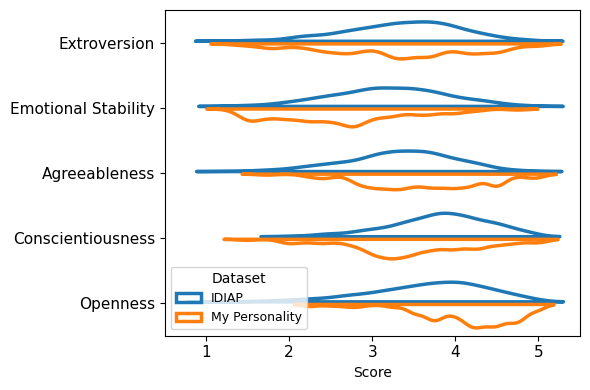

In [109]:
shared_labels = [
    "Extroversion",
    "Emotional Stability",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
]

joint_vars = pd.concat([data_vars, my_personality_vars], axis=0)[
    shared_labels + ["Dataset"]
]
joint_vars = joint_vars.reset_index(drop=True)
joint_vars = joint_vars.melt(id_vars=["Dataset"], var_name="Trait", value_name="Score")

plt.figure(figsize=(6, 4))
sns.violinplot(
    data=joint_vars,
    y="Trait",
    x="Score",
    hue="Dataset",
    split=True,
    gap=0.1,
    inner=None,
    fill=False,
    linewidth=2.5,
)
plt.yticks(range(5), shared_labels)
# plt.yticks(rotation=45)
plt.yticks(fontsize=11)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.xlim(0.5, 5.5)
plt.legend(title="Dataset", fontsize=9, loc="lower left", ncol=1)
plt.tight_layout()
plt.savefig("artifacts/both_targets_violin.pdf", format="pdf")
plt.show()

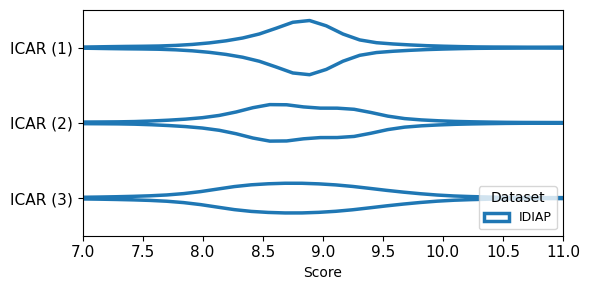

In [110]:
idiap_icar_vars = data_df[["icar_hat0", "icar_hat1", "icar_hat2"]].copy(deep=True)
idiap_icar_vars.columns = ["ICAR (1)", "ICAR (2)", "ICAR (3)"]
idiap_icar_vars["Dataset"] = "IDIAP"
idiap_icar_vars = idiap_icar_vars.reset_index(drop=True)
idiap_icar_vars = idiap_icar_vars.melt(
    id_vars=["Dataset"], var_name="Trait", value_name="Score"
)

plt.figure(figsize=(6, 3))
sns.violinplot(
    data=idiap_icar_vars,
    x="Score",
    y="Trait",
    hue="Dataset",
    gap=0.1,
    inner=None,
    fill=False,
    linewidth=2.5,
)
plt.yticks(range(3), ["ICAR (1)", "ICAR (2)", "ICAR (3)"])
plt.yticks(fontsize=11)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.xlim(7, 11)
plt.legend(title="Dataset", fontsize=9, loc="lower right", ncol=2)
plt.tight_layout()
plt.savefig("artifacts/idiap_icar_violin_horizontal.pdf", format="pdf")
plt.show()